In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
import tensorflow as tf 


In [7]:
df = pd.read_csv('../kdt4/workplace2/data/deep_data_files-20220321T014240Z-001/deep_data_files/pima-indians-diabetes.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()
# 바이너리는 멀티나 바이너리로 만들 수 있음..
# 하나의 노드에서 0과 1이 나오는 방식으로 하기위해 바이너리로 씀.. (원핫하지않음)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# diabetes여부를 판별하는 모델을 만들고, 모델을 평가하시오 

In [14]:
y = df.iloc[:,8:]
x = df.iloc[:,:8]

In [17]:
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1)) #로지스틱이라 sigmoid씀 .. 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [19]:
model.fit(x,y,epochs=100,batch_size=20) # x는 정규화한값으로 씀,.(scale)

Epoch 1/100
39/39 [==============================] - 0s 1ms/step - loss: 5.5244 - accuracy: 0.6406
Epoch 2/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 3/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 4/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 5/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 6/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 7/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 8/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 9/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 10/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 11/

39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 84/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 85/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 86/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 87/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 88/100
39/39 [==============================] - 0s 2ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 89/100
39/39 [==============================] - 0s 2ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 90/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 91/100
39/39 [==============================] - 0s 1ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 92/100
39/39 [==============================] - 0s 2ms/step - loss: 5.4621 - accuracy: 0.6458
Epoch 93/100


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_sc = scaler.fit_transform(df.iloc[:,:8])

In [32]:
x_sc

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [26]:
hist= model.fit(x_scaled,y,epochs=100,batch_size=20)

Epoch 1/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.7852
Epoch 2/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4338 - accuracy: 0.7865
Epoch 3/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7852
Epoch 4/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7891
Epoch 5/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7865
Epoch 6/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7852
Epoch 7/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4319 - accuracy: 0.7891
Epoch 8/100
39/39 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.7865
Epoch 9/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.7878
Epoch 10/100
39/39 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.7878
Epoch 11/

39/39 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.7982
Epoch 84/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.7982
Epoch 85/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8034
Epoch 86/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.7995
Epoch 87/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8021
Epoch 88/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.7943
Epoch 89/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8008
Epoch 90/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.7995
Epoch 91/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.7995
Epoch 92/100
39/39 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8073
Epoch 93/100


In [33]:
model.evaluate(x_sc,y) # 트레인테스트 안나눠서 evaluation안해도돰...

24/24 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8164


[0.378993421792984, 0.81640625]

In [34]:
pred = model.predict(x_sc)

KeyError: 'val_accuracy'

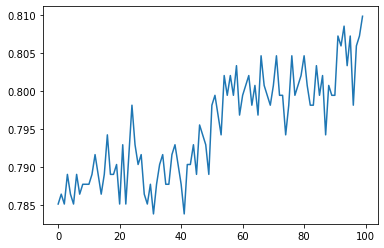

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


### 센세 시작